Размер датасета: (891, 15)
Колонки: ['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town', 'alive', 'alone']


/tmp/ipython-input-1097230234.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=titanic, x='sex', palette='viridis')
/tmp/ipython-input-1097230234.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=titanic, x='pclass', y='age', palette='Set2')
/tmp/ipython-input-1097230234.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=titanic, x='survived', y='fare', palette='coolwarm')


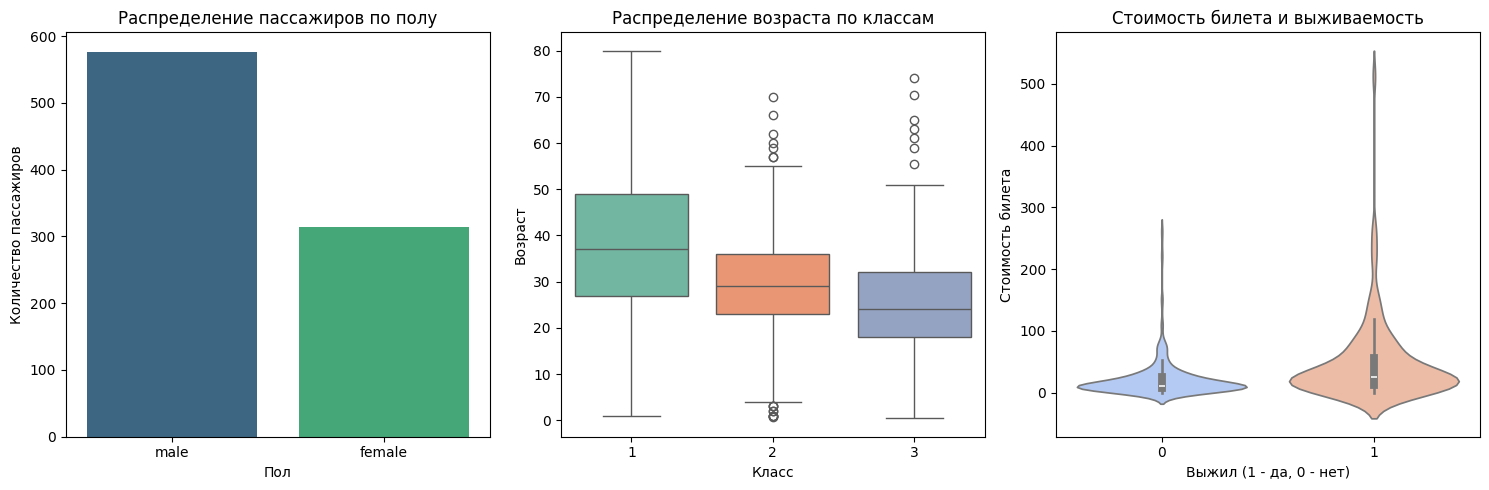

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Загружаем данные
titanic = sns.load_dataset('titanic')
print(f"Размер датасета: {titanic.shape}")
print(f"Колонки: {titanic.columns.tolist()}")
titanic.head()

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.countplot(data=titanic, x='sex', palette='viridis')
plt.title('Распределение пассажиров по полу')
plt.xlabel('Пол')
plt.ylabel('Количество пассажиров')

# График 2: Распределение возраста по классам (boxplot)
plt.subplot(1, 3, 2)
sns.boxplot(data=titanic, x='pclass', y='age', palette='Set2')
plt.title('Распределение возраста по классам')
plt.xlabel('Класс')
plt.ylabel('Возраст')

# График 3: Связь между стоимостью билета и выживаемостью (violinplot)
plt.subplot(1, 3, 3)
sns.violinplot(data=titanic, x='survived', y='fare', palette='coolwarm')
plt.title('Стоимость билета и выживаемость')
plt.xlabel('Выжил (1 - да, 0 - нет)')
plt.ylabel('Стоимость билета')

plt.tight_layout()
plt.show()

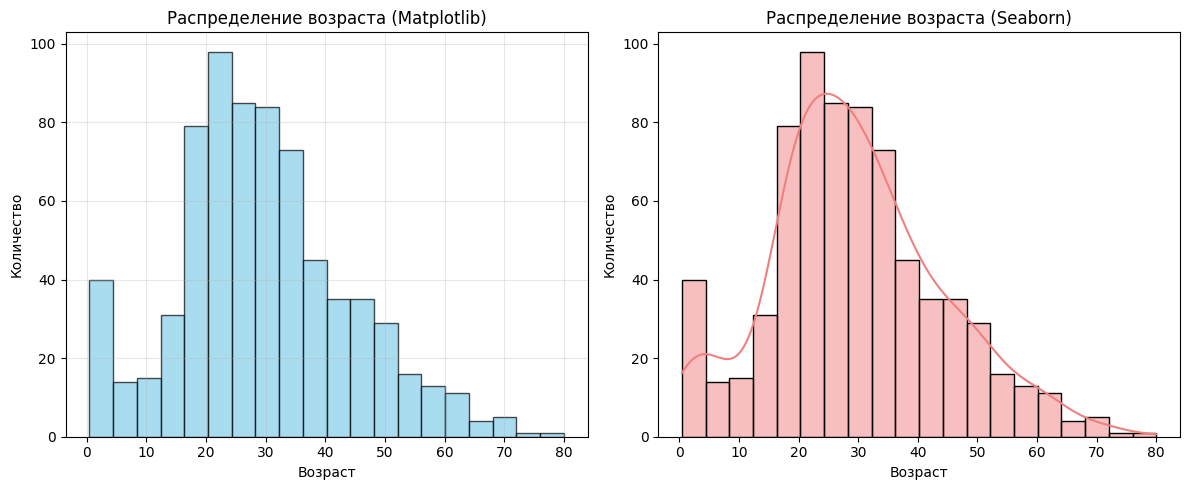

In [3]:
# Создаем фигуру для сравнения
plt.figure(figsize=(12, 5))

# Matplotlib версия
plt.subplot(1, 2, 1)
ages = titanic['age'].dropna()
plt.hist(ages, bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Распределение возраста (Matplotlib)')
plt.xlabel('Возраст')
plt.ylabel('Количество')
plt.grid(True, alpha=0.3)

# Seaborn версия
plt.subplot(1, 2, 2)
sns.histplot(data=titanic, x='age', bins=20, kde=True, color='lightcoral')
plt.title('Распределение возраста (Seaborn)')
plt.xlabel('Возраст')
plt.ylabel('Количество')

plt.tight_layout()
plt.show()

/tmp/ipython-input-291834843.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=titanic, x='pclass', y='survived', hue='sex', palette='Set2', ci=None)
/tmp/ipython-input-291834843.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=titanic, x='survived', y='age', palette=['red', 'green'])


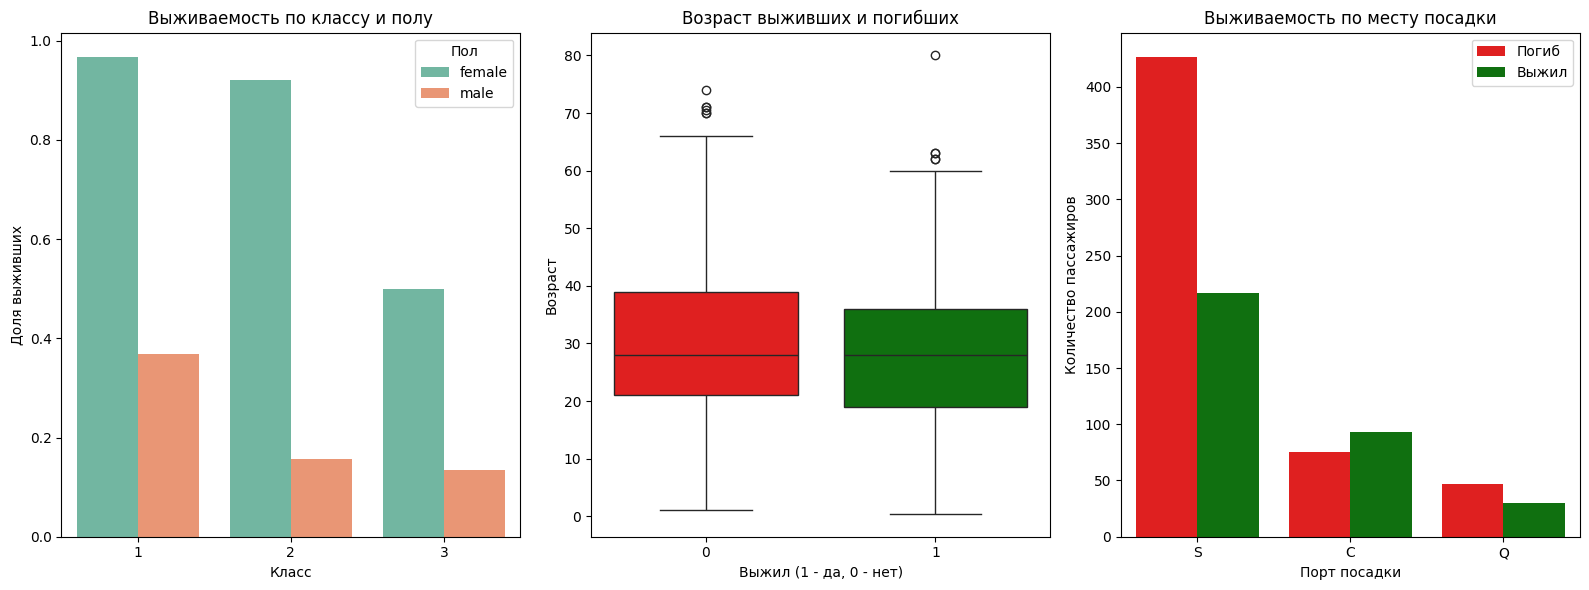

/tmp/ipython-input-291834843.py:35: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=titanic.dropna(subset=['age_group']),


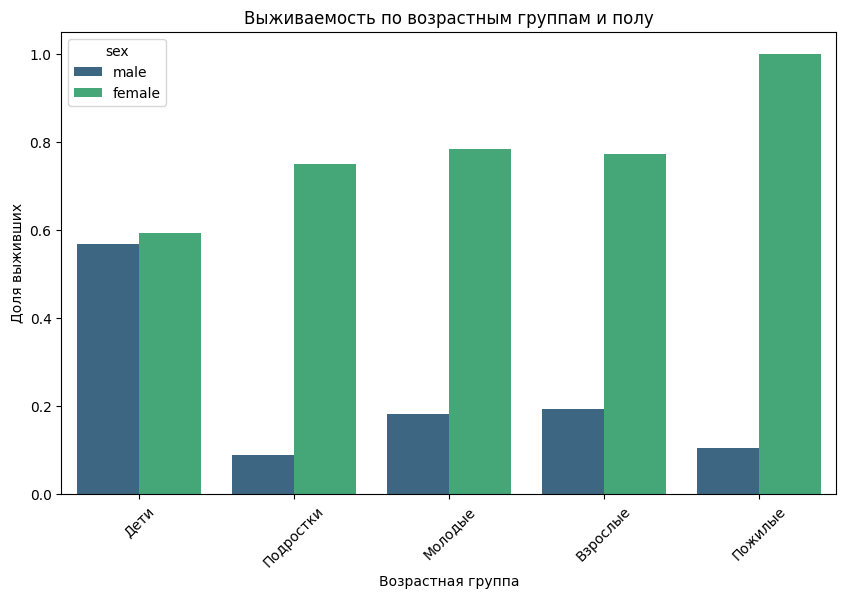

In [4]:
# Создаем комплексную визуализацию факторов выживаемости
plt.figure(figsize=(16, 6))

# График 1: Выживаемость по полу и классу
plt.subplot(1, 3, 1)
sns.barplot(data=titanic, x='pclass', y='survived', hue='sex', palette='Set2', ci=None)
plt.title('Выживаемость по классу и полу')
plt.xlabel('Класс')
plt.ylabel('Доля выживших')
plt.legend(title='Пол')

# График 2: Распределение возраста выживших и погибших
plt.subplot(1, 3, 2)
sns.boxplot(data=titanic, x='survived', y='age', palette=['red', 'green'])
plt.title('Возраст выживших и погибших')
plt.xlabel('Выжил (1 - да, 0 - нет)')
plt.ylabel('Возраст')

# График 3: Выживаемость по точкам посадки
plt.subplot(1, 3, 3)
sns.countplot(data=titanic, x='embarked', hue='survived', palette=['red', 'green'])
plt.title('Выживаемость по месту посадки')
plt.xlabel('Порт посадки')
plt.ylabel('Количество пассажиров')
plt.legend(['Погиб', 'Выжил'])

plt.tight_layout()
plt.show()
# Дополнительный анализ: выживаемость детей
titanic['age_group'] = pd.cut(titanic['age'],
                             bins=[0, 12, 18, 35, 60, 100],
                             labels=['Дети', 'Подростки', 'Молодые', 'Взрослые', 'Пожилые'])

plt.figure(figsize=(10, 6))
sns.barplot(data=titanic.dropna(subset=['age_group']),
            x='age_group', y='survived', hue='sex',
            palette='viridis', ci=None)
plt.title('Выживаемость по возрастным группам и полу')
plt.xlabel('Возрастная группа')
plt.ylabel('Доля выживших')
plt.xticks(rotation=45)
plt.show()